<a href="https://colab.research.google.com/github/eryyyj/Machine_Learning/blob/main/Finals/HOA6.1/PISALBON_Hands_on_Activity_6_1_Dimensionality_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity 6.1 Dimensionality Reduction

#### Objective:

This activity aims to perform reduction of dimensions using PCA

#### Intended Learning Outcomes (ILOs):
* Demonstrate how to use pipelining for transformation and scaling.
* Deomnstrate how to perform principal component analysis to reduce dimension.


#### Resources:
* Jupyter Notebook
* Wholesale customers data.csv
* Human_Activity_Recognition_Using_Smartphones_Data.csv

#### Procedure:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import the data and check the data types.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

file = '/content/drive/MyDrive/DATASETS/Wholesale customers data.csv'
data = pd.read_csv(file)
data.shape


(440, 8)

In [ ]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
data.dtypes

,0
Channel,int64
Region,int64
Fresh,int64
Milk,int64
Grocery,int64
Frozen,int64
Detergents_Paper,int64
Delicassen,int64


Drop the channel and region columns as they won't be used.

Copy this version of the data (using the `copy` method) to a variable to preserve it.

In [ ]:
data = data.drop(['Channel', 'Region'], axis=1)

Convert the remaining columns to floats if necessary.

In [ ]:
for col in data.columns:
    data[col] = data[col].astype(float)

Preserve the original data.

In [ ]:
data_orig = data.copy()

Examine the correlation and skew.

In [ ]:
corr_mat = data.corr()

# Strip the diagonal for future examination
for x in range(corr_mat.shape[0]):
    corr_mat.iloc[x,x] = 0.0

corr_mat

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Fresh,0.000000,0.100510,-0.011854,0.345881,-0.101953,0.244690
Milk,0.100510,0.000000,0.728335,0.123994,0.661816,0.406368
Grocery,-0.011854,0.728335,0.000000,-0.040193,0.924641,0.205497
Frozen,0.345881,0.123994,-0.040193,0.000000,-0.131525,0.390947
Detergents_Paper,-0.101953,0.661816,0.924641,-0.131525,0.000000,0.069291
Delicassen,0.244690,0.406368,0.205497,0.390947,0.069291,0.000000


In [ ]:
corr_mat.abs().idxmax()

,0
Fresh,Frozen
Milk,Grocery
Grocery,Detergents_Paper
Frozen,Delicassen
Detergents_Paper,Grocery
Delicassen,Milk


Interpret the result of the correlation

My Interpretation on the result of the correlation tells you which feature or columns in our dataset has the best correlation with other features, on the result the Fresh column correlates with the Frozen column with a low positive  correlation. The Milk column has a strong correlation between the Grocery column with a High positive correlation. The Grocery Column has the best correlation between Detergents_Paper with a very high positive correlation and vice versa. while the frozen column has the best correlation with the Delicassen column with Low Positive correlation, and Delicassen has the best correlation with milk with also A Low Positive correlation.

Examine the skew values and log transform.

In [ ]:
log_columns = data.skew().sort_values(ascending=False)
log_columns = log_columns.loc[log_columns > 0.75]

log_columns

,0
Delicassen,11.151586
Frozen,5.907986
Milk,4.053755
Detergents_Paper,3.631851
Grocery,3.587429
Fresh,2.561323


In [ ]:
for col in log_columns.index:
    data[col] = np.log1p(data[col])

Interpret the result

My interpretation of the result from earlier executed codes shows a data frame of the skewness value of the data distribution on every column in our dataset, the result shows Delicassen column has the highest positive skewness with an 11.15 value which indicates a long tail on the distribution on the right. The second highest would be the column of Frozen column with 5.90 positive skewness value and the third would be Milk with 4.05 positive skewness value

Scale the data again

In [ ]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()

for col in data.columns:
    data[col] = mms.fit_transform(data[[col]]).squeeze()

Using Scikit-learn's pipeline function, recreate the data pre-processing scheme above (transformation and scaling) using a pipeline

In [ ]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

# The custom NumPy log transformer
log_transformer = FunctionTransformer(np.log1p)

# The pipeline
estimators = [('log1p', log_transformer), ('minmaxscale', MinMaxScaler())]
pipeline = Pipeline(estimators)

# Convert the original data
data_pipe = pipeline.fit_transform(data_orig)

In [ ]:
np.allclose(data_pipe, data)

True

Perform PCA with n_components ranging from 1 to 5. Store the amount of explained variance for each number of dimensions.Also store the feature importance for each number of dimensions.

In [ ]:
from sklearn.decomposition import PCA

pca_list = list()
feature_weight_list = list()

# Fit a range of PCA models

for n in range(1, 6):

    # Create and fit the model
    PCAmod = PCA(n_components=n)
    PCAmod.fit(data)

    # Store the model and variance
    pca_list.append(pd.Series({'n':n, 'model':PCAmod,
                               'var': PCAmod.explained_variance_ratio_.sum()}))

    # Calculate and store feature importances
    abs_feature_values = np.abs(PCAmod.components_).sum(axis=0)
    feature_weight_list.append(pd.DataFrame({'n':n,
                                             'features': data.columns,
                                             'values':abs_feature_values/abs_feature_values.sum()}))

pca_df = pd.concat(pca_list, axis=1).T.set_index('n')
pca_df

,model,var
n,,
1,PCA(n_components=1),0.448011
2,PCA(n_components=2),0.72099
3,PCA(n_components=3),0.827534
4,PCA(n_components=4),0.923045
5,PCA(n_components=5),0.979574


Create a table of feature importances for each data column.

In [ ]:
features_df = (pd.concat(feature_weight_list)
               .pivot(index='n', columns='features', values='values'))

features_df

features,Delicassen,Detergents_Paper,Fresh,Frozen,Grocery,Milk
n,,,,,,
1,0.071668,0.335487,0.060620,0.095979,0.190236,0.246010
2,0.151237,0.177519,0.158168,0.222172,0.112032,0.178872
3,0.165518,0.145815,0.211434,0.268363,0.084903,0.123967
4,0.224259,0.149981,0.239527,0.214275,0.070971,0.100987
5,0.211840,0.182447,0.196382,0.178104,0.067338,0.163888


Create a plot of explained variances.

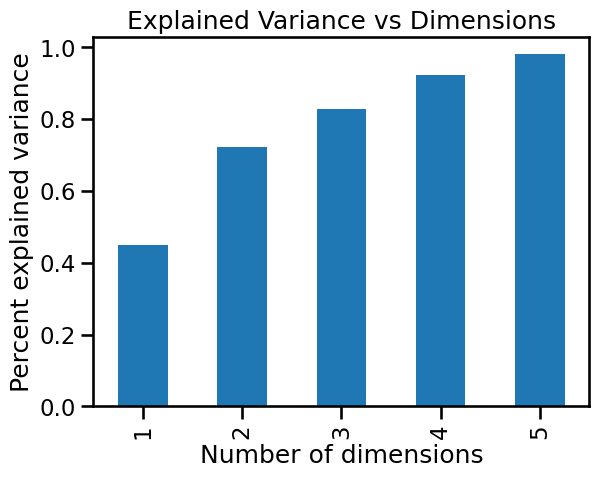

In [ ]:
sns.set_context('talk')

ax = pca_df['var'].plot(kind='bar')

ax.set(xlabel='Number of dimensions',
       ylabel='Percent explained variance',
       title='Explained Variance vs Dimensions');

And here's a plot of feature importances.

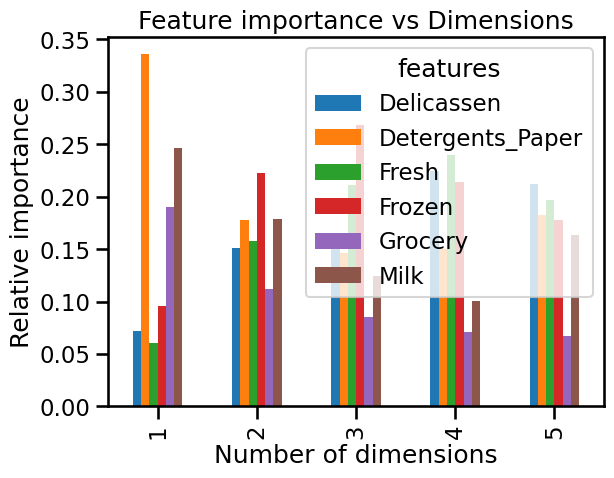

In [ ]:
ax = features_df.plot(kind='bar')

ax.set(xlabel='Number of dimensions',
       ylabel='Relative importance',
       title='Feature importance vs Dimensions');

Let us include the PCA in building the model using logistic regression and pipeline.

Load the dataset.

In [ ]:
filepath = '/content/drive/MyDrive/DATASETS/Human_Activity_Recognition_Using_Smartphones_Data.csv'
df = pd.read_csv(filepath)

Create a pipeline, then predicts the "Activity" column over a 5-fold StratifiedShuffleSplit, and returns the average test accuracy

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


X = df.drop('Activity', axis=1)
y = df.Activity
sss = StratifiedShuffleSplit(n_splits=5, random_state=42)

def get_avg_score(n):
    pipe = [
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=n)),
        ('estimator', LogisticRegression())
    ]
    pipe = Pipeline(pipe)
    scores = []
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X.loc[train_index], X.loc[test_index]
        y_train, y_test = y.loc[train_index], y.loc[test_index]
        pipe.fit(X_train, y_train)
        scores.append(accuracy_score(y_test, pipe.predict(X_test)))
    return np.mean(scores)


ns = [10, 20, 50, 100, 150, 200, 300, 400]
score_list = [get_avg_score(n) for n in ns]

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Plot the average accuracy by number of dimensions.

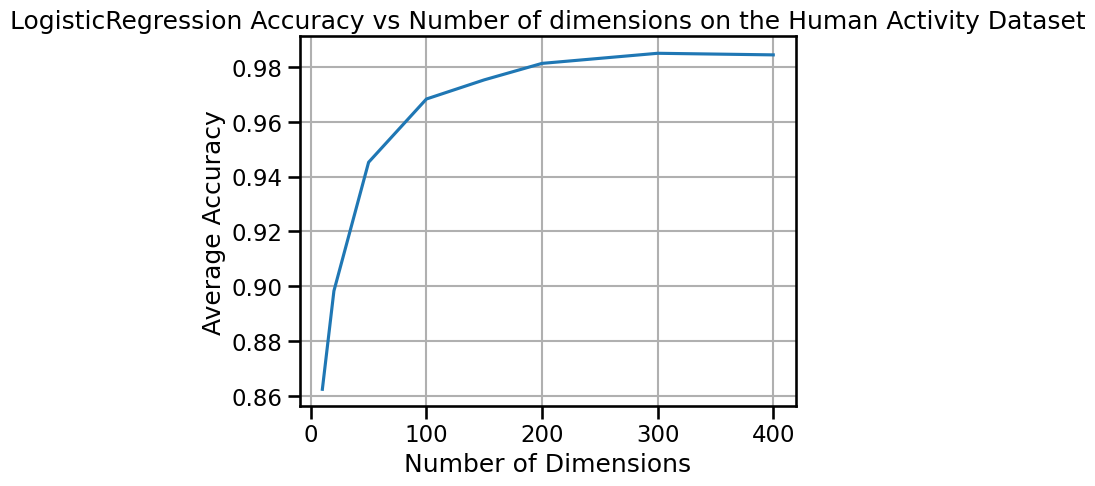

In [ ]:
sns.set_context('talk')

ax = plt.axes()
ax.plot(ns, score_list)
ax.set(xlabel='Number of Dimensions',
       ylabel='Average Accuracy',
       title='LogisticRegression Accuracy vs Number of dimensions on the Human Activity Dataset')
ax.grid(True)

Supplementary Activity:
* Choose your own dataset.
* Import the dataset
* Determine the number of datapoints, columns and data types
* Remove unneccesary columns
* Do data cleaning such as removing empty values(NaN), replacing missing data .
* Standardize the variables (if necessary).
* Perform descriptive statistics such as mean, median and mode
* Perform data visualization
* Use pipelining.
* Perform PCA
* Use logistic regression with PCA.
* Plot the average accuracy by number of dimensions.

In [ ]:
#importing the iris data set  without the target values
from sklearn.datasets import load_iris
iris = load_iris()
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
# Determining the number of datapoints, columns and data types
print("number of datapoints: " ,len(iris_df))
print("number of columns: " ,len(iris_df.columns))
print("data types:\n" ,iris_df.dtypes)

number of datapoints:  150
number of columns:  4
data types:
 sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
dtype: object


In [ ]:
# checking for null values
iris_df.isnull().sum()

,0
sepal length (cm),0
sepal width (cm),0
petal length (cm),0
petal width (cm),0


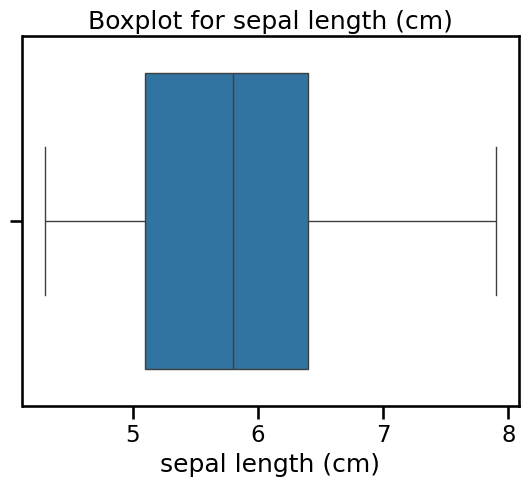

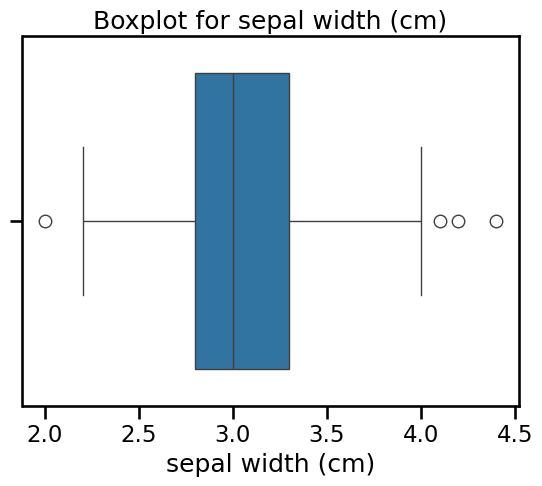

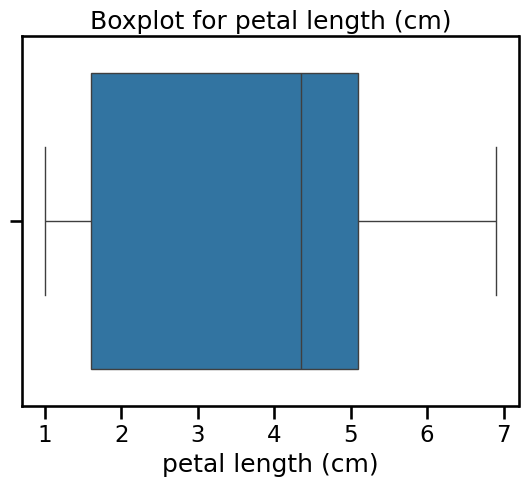

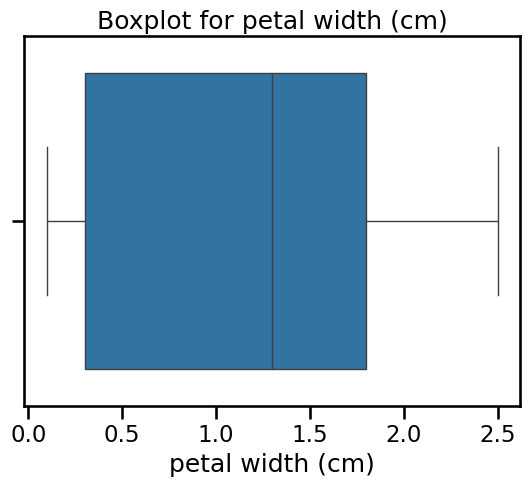

In [ ]:
# checking for outliers per column
for column in iris_df.columns:
    plt.figure()
    sns.boxplot(x=iris_df[column])  # Horizontal boxplot
    plt.title(f'Boxplot for {column}')
    plt.xlabel(column)
    plt.show()

In [ ]:
# standardizing the variables of my dataset
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_iris_df = scaler.fit_transform(iris_df)
scaled_iris_df = pd.DataFrame(scaled_iris_df, columns=iris_df.columns)
scaled_iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444


In [ ]:
# getting the mean, median and mode in one data frame
iris_desc = pd.concat([iris_df.describe().loc[['mean', '50%']].rename(index={'50%': 'median'}),iris_df.mode()])
iris_desc.rename(index={0: 'mode'}, inplace=True)
iris_desc.drop(iris_desc.tail(1).index, inplace=True)
iris_desc

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
mean,5.843333,3.057333,3.758,1.199333
median,5.800000,3.000000,4.350,1.300000
mode,5.000000,3.000000,1.400,0.200000


In [ ]:
# checking the skewness of the iris dataset
scaled_iris_df.skew()

,0
sepal length (cm),0.314911
sepal width (cm),0.318966
petal length (cm),-0.274884
petal width (cm),-0.102967


we don't need to fix our data since the skewness doesn't exceed the threshold value which is 0.75

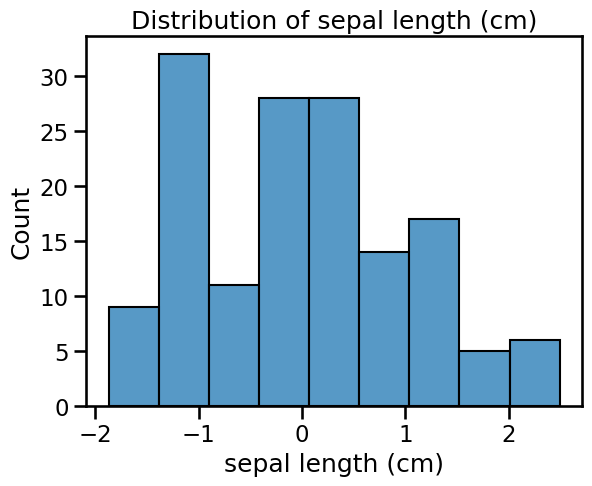

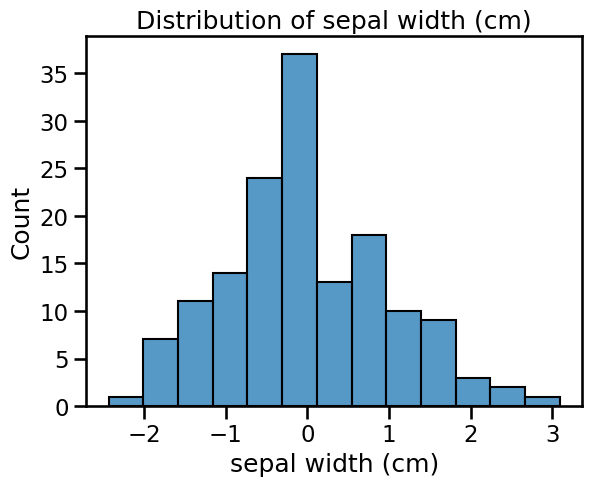

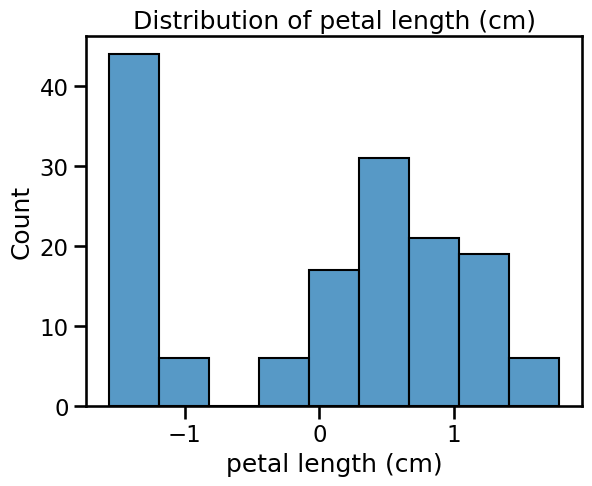

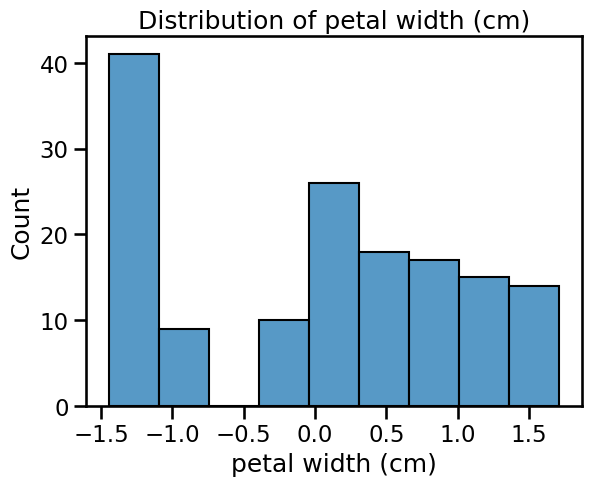

In [ ]:
# plotting the distribution of the dataset
for column in scaled_iris_df.columns:
    plt.figure()
    sns.histplot(x=scaled_iris_df[column])
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.show()

<Axes: >

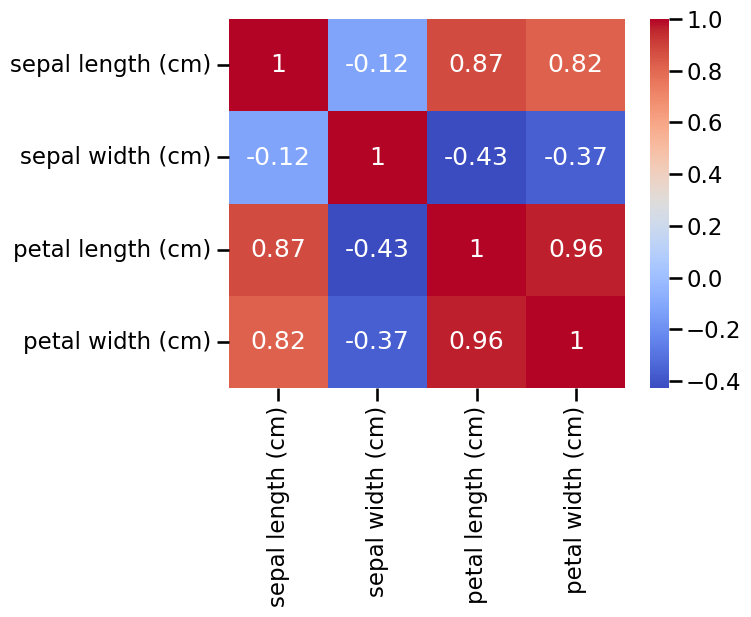

In [ ]:
# getting the correlation of the variables and then plotting it in the heatmap
corr_df = scaled_iris_df.corr()
sns.heatmap(corr_df, annot=True, cmap='coolwarm')

<Axes: xlabel='petal width (cm)', ylabel='petal length (cm)'>

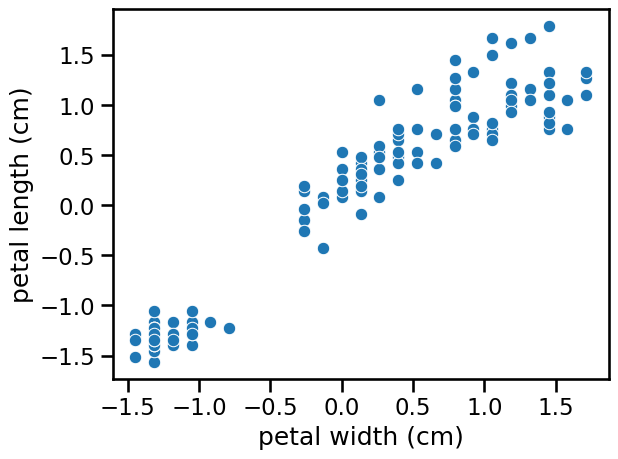

In [ ]:
# plotting the points of petal length vs peta width
sns.scatterplot(x='petal width (cm)', y='petal length (cm)', data=scaled_iris_df)

<Axes: xlabel='petal length (cm)', ylabel='sepal length (cm)'>

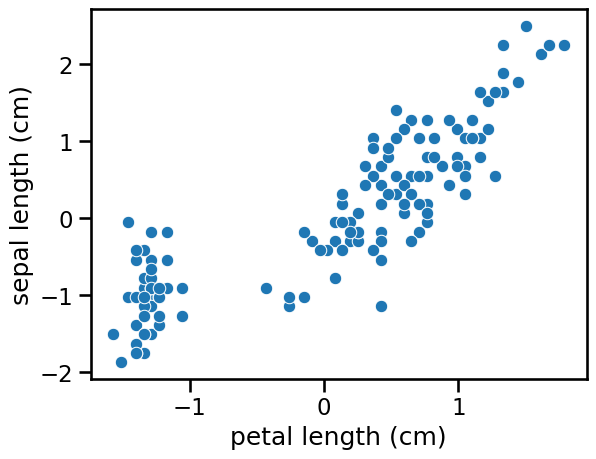

In [ ]:
#plotting the petal length and the sepal length
sns.scatterplot(x='petal length (cm)', y='sepal length (cm)', data=scaled_iris_df)

<Axes: xlabel='petal width (cm)', ylabel='sepal length (cm)'>

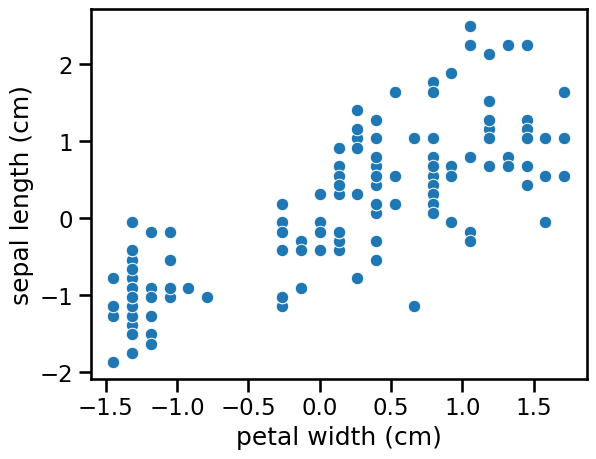

In [ ]:
# plotting petal width and sepal length
sns.scatterplot(x='petal width (cm)', y='sepal length (cm)', data=scaled_iris_df)

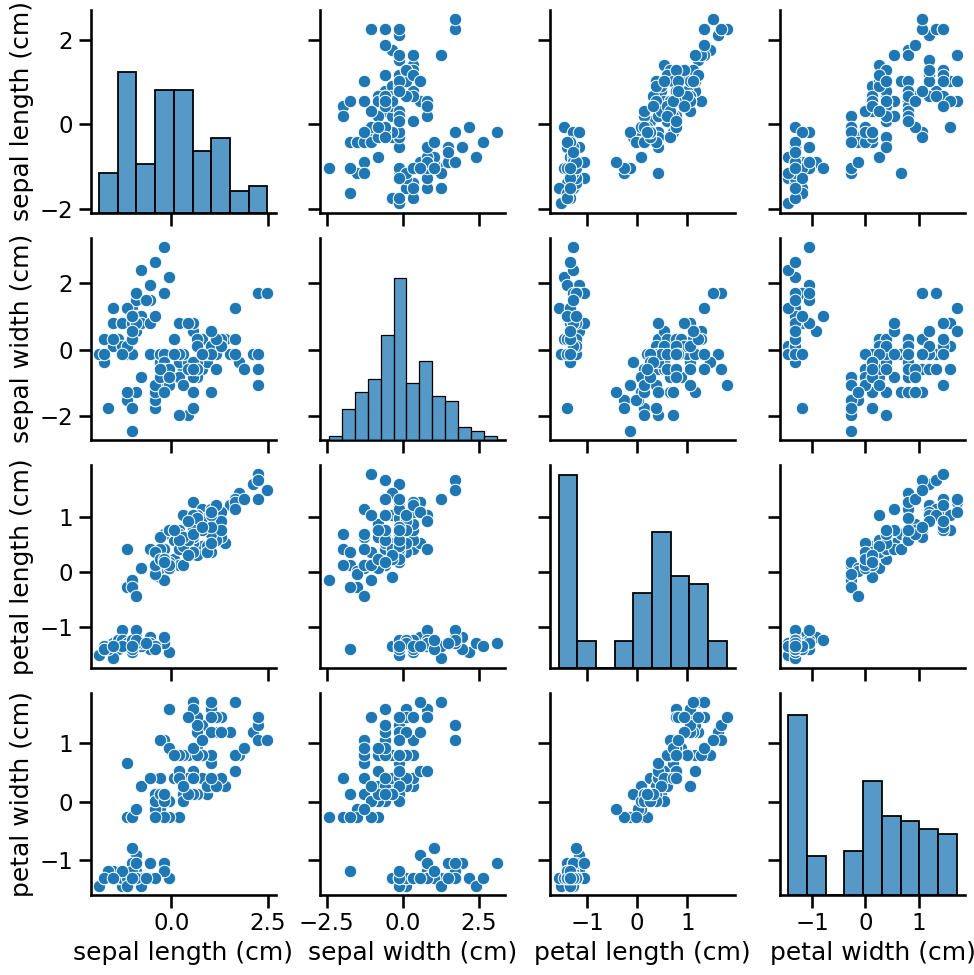

In [ ]:
sns.pairplot(scaled_iris_df)

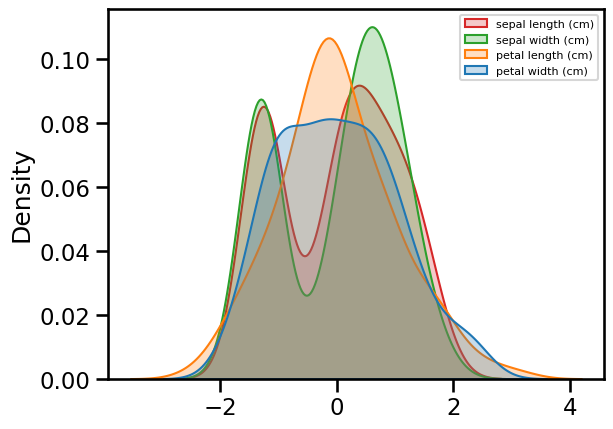

In [ ]:
#plotting the data with kdeplot
sns.kdeplot(scaled_iris_df, fill = True)
# setting the legend size
plt.legend(scaled_iris_df.columns, fontsize=8)

In [ ]:
# using pipelinin on the iris dataset

from sklearn.preprocessing import FunctionTransformer
from sklearn.pipeline import Pipeline

# The custom NumPy log transformer
log_transformer = FunctionTransformer(np.log1p)

# The pipeline
estimators = [('log1p', log_transformer), ('minmaxscale', MinMaxScaler())]
pipeline = Pipeline(estimators)

# Convert the original data
iris_pipe = pipeline.fit_transform(iris_df)

In [ ]:
# checking if the original data is the same as the data we pipelined
np.allclose(iris_pipe, scaled_iris_df)

False

In [ ]:
# getting the skewness of the pipelined iris data set
pd.DataFrame(iris_pipe).skew()

,0
0,0.082584
1,-0.012893
2,-0.522386
3,-0.407217


In [ ]:
pd.DataFrame(iris_pipe).isnull().sum()

,0
0,0
1,0
2,0
3,0


In [ ]:
from sklearn.decomposition import PCA

pca_list = list()
feature_weight_list = list()

# Fit a range of PCA models

for n in range(1, 5):

    # Create and fit the model
    PCAmod = PCA(n_components=n)
    datas.append(PCAmod.fit(iris_pipe))
    # Store the model and variance
    pca_list.append(pd.Series({'n':n, 'model':PCAmod,
                               'var': PCAmod.explained_variance_ratio_.sum()}))

    # Calculate and store feature importances
    abs_feature_values = np.abs(PCAmod.components_).sum(axis=0)
    feature_weight_list.append(pd.DataFrame({'n':n,
                                             'features': scaled_iris_df.columns,
                                             'values':abs_feature_values/abs_feature_values.sum()}))

pca_df = pd.concat(pca_list, axis=1).T.set_index('n')
pca_df

,model,var
n,,
1,PCA(n_components=1),0.852585
2,PCA(n_components=2),0.966038
3,PCA(n_components=3),0.994131
4,PCA(n_components=4),1.0


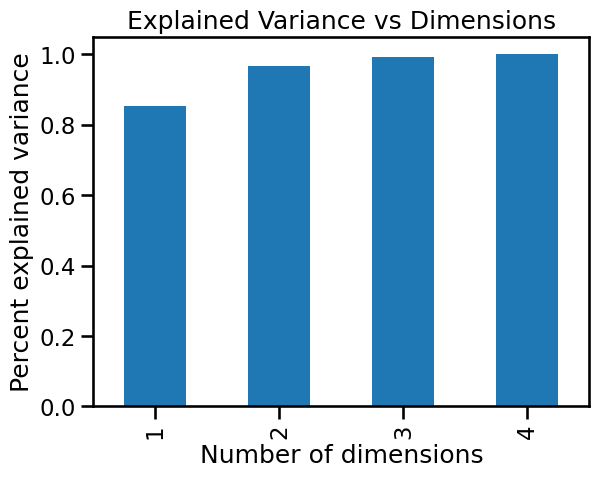

In [ ]:
# plotting the explained of the pca model on the iris dataset
sns.set_context('talk')

ax = pca_df['var'].plot(kind='bar')

ax.set(xlabel='Number of dimensions',
       ylabel='Percent explained variance',
       title='Explained Variance vs Dimensions');

In [ ]:
# converting scaled iris df to array
scaled_iris = np.array(scaled_iris_df)

In [ ]:
scaled_iris_df.skew()

,0
sepal length (cm),0.314911
sepal width (cm),0.318966
petal length (cm),-0.274884
petal width (cm),-0.102967


In [134]:
# using logistic regression with pca while getting also sa average accuracy
sss = StratifiedShuffleSplit(n_splits=5, random_state=42)
X_iris = iris_df
y_iris = pd.DataFrame(iris.target)

def get_avg_score(n):
    pipe = [
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=n)),
        ('estimator', LogisticRegression())
    ]
    pipe = Pipeline(pipe)
    scores = []
    for train_index, test_index in sss.split(X_iris, y_iris):
        X_train, X_test = X_iris.loc[train_index], X_iris.loc[test_index]
        y_train, y_test = y_iris.loc[train_index],y_iris.loc[test_index]
        pipe.fit(X_train, y_train)
        scores.append(accuracy_score(y_test, pipe.predict(X_test)))
    return np.mean(scores)


ns = [1,2,3,4]
score_list = [get_avg_score(n) for n in ns]

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

In [136]:
for score in score_list:
  print(score)

0.9466666666666667
0.9466666666666667
0.9466666666666667
0.9466666666666667


In [137]:
sss = StratifiedShuffleSplit(n_splits=5, random_state=42)
X_iris = iris_df
y_iris = pd.DataFrame(iris.target)

def get_avg_score(n):
    pipe = [
        ('scaler', StandardScaler()),
        ('pca', PCA(n_components=n)),
        ('estimator', LogisticRegression())
    ]
    pipe = Pipeline(pipe)
    scores = []
    for train_index, test_index in sss.split(X_iris, y_iris):
        X_train, X_test = X_iris.loc[train_index], X_iris.loc[test_index]
        y_train, y_test = y_iris.loc[train_index],y_iris.loc[test_index]
        pipe.fit(X_train, y_train)
        scores.append(accuracy_score(y_train, pipe.predict(X_train)))
    return np.mean(scores)


ns_train = [1,2,3,4]
score_list_train = [get_avg_score(n) for n in ns_train]

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

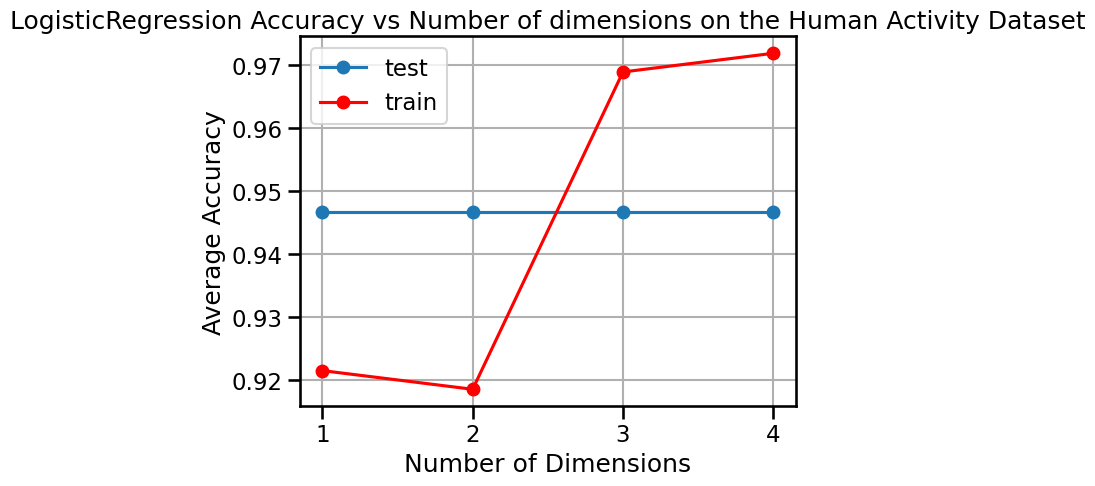

In [140]:
# plotting the accuracy
sns.set_context('talk')

ax = plt.axes()
ax.plot(ns, score_list, '-o')
ax.plot(ns_train, score_list_train, '-o',color='red')
ax.set(xlabel='Number of Dimensions',
       ylabel='Average Accuracy',
       title='LogisticRegression Accuracy vs Number of dimensions on the Human Activity Dataset',
       xticks = ns)
ax.legend(['test','train'])
ax.grid(True)

#### Conclusion

In this HOA activity we have done Dimensionality Reduction, I understood dimensionality reduction as a tool on our machine learning  to provide a faster training and inference to the data and it provides us easier data visualization because it eliminates unnecessary columns, or it gets only the most necessary data on out dataset. For example, on the mnist dataset there are column pixels that are unnecessary with 0 values, with the use of PCA it only gets the important value that makes up the number on the mnist dataset by eliminating the columns on the dataset. <br> <br>

On my supplementary activity, I have concluded several things, if we are going to implement PCA we should always scale our dataset and fix the skewness of the distibution of the data before proceeding to the next step, in doing the logistic regression I have used the stratified shuffle split because I said earlier that we need to have a zero skew distribution of data, and when we split the training and the test the skew of the distribution of the data can change, but when we use the stratified shuffle split it will preserved the distribution of the data. <br> <br>

The result of the accuracy of my models using the pca, shows a constant accuracy as the number of principal component increases my hypothesis would be the model overfits and underfits as shown on the graph above shows the accuracy of testing is higher than the training data when principal components are 1 and 2. When the principal components are 3 and 4, it shows a higher accuracy on the training than the testing. I also hypothesize that the result of the testing dataset shows a constant accuracy value because th class of the dataset is well separated and using the PCA will not be as effective on the dataset that I chose